# Sinuosoidal Reentrant Honeycomb Analysis

## Author
*Code created by Mungekar Gaurav Bholanath Madhavi*

## Description
This repository contains calculations based on the research paper by A. Acharya, V. Muthkani, A. DasGupta, and A. Jain, titled “An infill-based approach towards stiffer auxetic lattices: Design and study of enhanced in-plane elastic properties.” The aim is to replicate and analyze the results presented in the study.

## Citation
A. Acharya, V. Muthkani, A. DasGupta, and A. Jain, “An infill-based approach towards stiffer auxetic lattices: Design and study of enhanced in-plane elastic properties,” *Mechanics of Materials*, vol. 188, Jan. 2024, doi: [10.1016/j.mechmat.2023.104849](https://doi.org/10.1016/j.mechmat.2023.104849).

## Prerequisites
- Python 3.x
- Jupyter Notebook
- Required Libraries:
  - numpy
  - pandas
  - sympy
  - scipy

In [1]:
import numpy as np
import sympy as sym
from IPython.display import Math, Latex
from IPython.display import Image

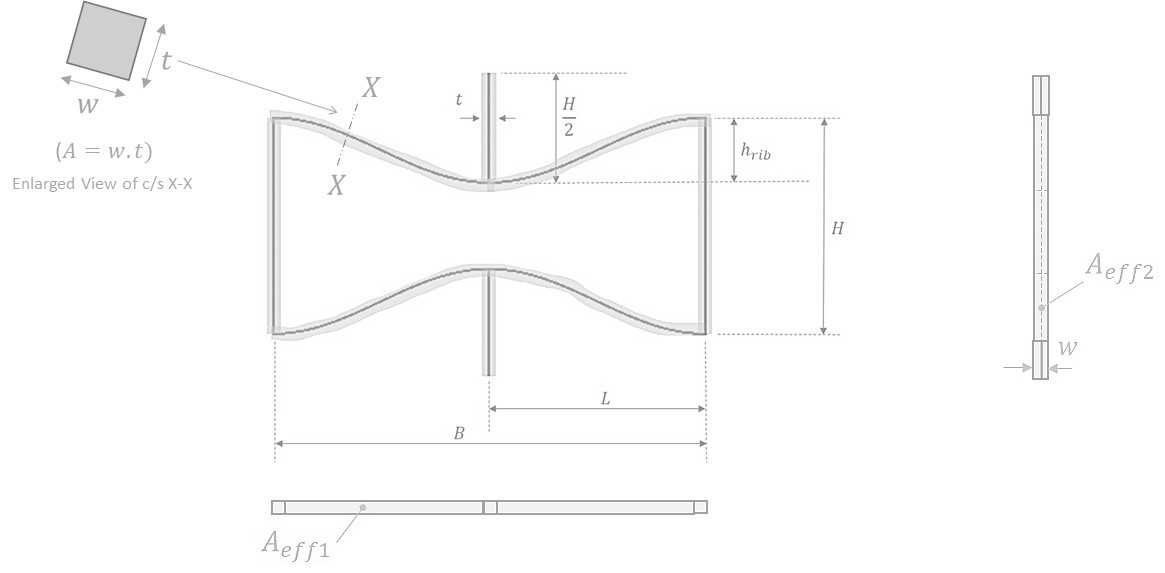

In [2]:
L, H, t, w = sym.symbols('L H t w')
theta = sym.symbols(r'\theta')

A_eff1, A_eff2 = sym.symbols(r'A_\mathrm{eff_{1}}, A_\mathrm{eff_{2}}')
h_rib = sym.Symbol(r'h_\mathrm{rib}')
A = sym.Symbol(r'A')
I = sym.Symbol(r'I')
U = sym.Symbol(r'U')
E = sym.Symbol(r'E')
x, y, s = sym.symbols('x y s')
Mf, Nf, Vf, P, Q = sym.symbols(r'M_\mathrm{f} N_\mathrm{f} V_\mathrm{f} P Q')
pi = sym.Symbol(r'\pi')
sigma = sym.Symbol(r'\sigma')
B = sym.Symbol('B')

In [3]:
subs = {
    I: (w * t**3) / 12,
    A: w * t,
    A_eff1: (2 * H - 2 * h_rib) * w,
    A_eff2: 2 * L * w,
    B: 2 * L
}

known_values = {
    t: 0.8,
    L: 10,
    w: 1,
    H: 10,
    h_rib: 3,
    pi: 3.14159,
    E: 69,
}


In [4]:
import pandas as pd

data = {
    'h_rib_FEA': [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5],
    'E11_Normalized_FEA_My': [
        0.079999998, 0.052636899, 0.026108677, 0.014637841,
        0.009344974, 0.006562782, 0.004940847, 0.003921415,
        0.003245842, 0.002782521
    ],
    'E22_Normalized_FEA_My': [
        0.000476286, 0.000452213, 0.000427679, 0.000402776,
        0.000377599, 0.000352243, 0.000326802, 0.000301368,
        0.000276026, 0.000250854
    ],
    'nu12_FEA_My': [
        0, -6.450447773, -6.414844626, -5.415132846,
        -4.632759303, -4.09243612, -3.724806064, -3.478535807,
        -3.322159492, -3.237755302
    ],
    'nu21_FEA_My': [
        -2.86101E-05, -0.056247553, -0.106582461, -0.151052407,
        -0.189657392, -0.222406953, -0.249280318, -0.270290137,
        -0.285415922, -0.2946386
    ]
}

df = pd.DataFrame(data)

df['h_rib_FEA'] = df['h_rib_FEA'].astype(float)

def get_properties(h_rib_value):
    selected_row = df[df['h_rib_FEA'] == float(h_rib_value)]
    if not selected_row.empty:
        return selected_row.iloc[0]
    return None

properties = get_properties(known_values[h_rib])

if properties is not None:
    print(f"Properties for h_rib = {known_values[h_rib]}:")
    print(f"E11_Normalized_FEA_My: {properties['E11_Normalized_FEA_My']}")
    print(f"E22_Normalized_FEA_My: {properties['E22_Normalized_FEA_My']}")
    print(f"nu12_FEA_My: {properties['nu12_FEA_My']}")
    print(f"nu21_FEA_My: {properties['nu21_FEA_My']}")
else:
    print(f"No data found for h_rib = {known_values[h_rib]}. Valid values: {list(df['h_rib_FEA'])}.")

E11_Normalized_FEA_My = properties['E11_Normalized_FEA_My']
E22_Normalized_FEA_My = properties['E22_Normalized_FEA_My']
nu12_FEA_My = properties['nu12_FEA_My']
nu21_FEA_My = properties['nu21_FEA_My']

Properties for h_rib = 3:
E11_Normalized_FEA_My: 0.004940847
E22_Normalized_FEA_My: 0.000326802
nu12_FEA_My: -3.724806064
nu21_FEA_My: -0.249280318


In [5]:
# Define the vertical displacement y
y = (h_rib / 2) * (1 - sym.cos(pi * x / L)) 
display(Math(r"y = " + sym.latex(y)))

# Define the differential coefficient ds/dx
d_x_coeff = sym.sqrt(1 + (sym.diff(y, x))**2)
display(Math(r"\frac{d s}{d x} = " + sym.latex(d_x_coeff)))

# Define the theta (slope)
theta = sym.atan(sym.diff(y, x))
display(Math(r"\theta = " + sym.latex(theta)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Properties in direction 1 due to loading in direction 1

In [6]:
# Define the bending moment Mf11
Mf11 = (P * h_rib / 2) - P * y
Mf11 = Mf11.simplify()
display(Math(r"M_{f_{11}} = " + sym.latex(Mf11)))

UM11_coeff = (Mf11**2 / (2 * E * I)) * d_x_coeff
UM11_coeff_simplified = sym.simplify(UM11_coeff)
display(Math(r"U_{M_{Coefficient_{11}}} = " + sym.latex(UM11_coeff_simplified)))

UM11_coeff_with_vars = UM11_coeff_simplified.subs(subs)
display(Math(r"U_{M_{Coefficient_{11}}} \text{ (with variables)} = " + sym.latex(UM11_coeff_with_vars)))

UM11_coeff_substituted = UM11_coeff_with_vars.subs(known_values)
display(Math(r"U_{M_{Coefficient_{11}}} \text{ (numerical)} = " + sym.latex(UM11_coeff_substituted)))

integral_UM11 = sym.integrate(UM11_coeff_substituted, (x, 0, L))
integral_UM11_substituted = integral_UM11.subs(known_values)
integral_UM11_substituted = integral_UM11_substituted.evalf()
display(Math(r"U_{M_{11}} = " + sym.latex(integral_UM11_substituted)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Define the normal force Nf_11
Nf_11_expr = P * sym.cos(theta)
Nf_11_simplified = Nf_11_expr.simplify()
display(Math(r"N_{f_{11}} = " + sym.latex(Nf_11_simplified)))

UN11_coeff = (Nf_11_simplified**2 / (2 * E * A)) * d_x_coeff 
UN11_coeff_simplified = sym.simplify(UN11_coeff)
display(Math(r"U_{N_{Coefficient_{11}}} = " + sym.latex(UN11_coeff_simplified)))

UN11_coeff_with_vars = UN11_coeff_simplified.subs(subs)
display(Math(r"U_{N_{Coefficient_{11}}} \text{ (with variables)} = " + sym.latex(UN11_coeff_with_vars)))

UN11_coeff_substituted = UN11_coeff_with_vars.subs(known_values)
display(Math(r"U_{N_{Coefficient_{11}}} \text{ (numerical)} = " + sym.latex(UN11_coeff_substituted)))

integral_UN11 = sym.integrate(UN11_coeff_substituted, (x, 0, L))
integral_UN11_substituted = integral_UN11.subs(known_values)
integral_UN11_substituted = integral_UN11_substituted.evalf()
display(Math(r"U_{N_{11}} = " + sym.latex(integral_UN11_substituted)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# Define U1_1
U1_1 = (integral_UM11_substituted + integral_UN11_substituted)

# Differentiate U1_1 with respect to P
u1_1_diff = sym.diff(U1_1, P)

# Display the result
display(Math(r"U_{1-1} = " + sym.latex(U1_1)))
display(Math(r"u_{1-1} = " + sym.latex(u1_1_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
sigma = 1 / (A_eff1) 
E11 = sigma / (u1_1_diff.subs(P, 1) / (B)) # Stiffness
E11 = E11.subs(subs)
E11 = E11.subs(known_values)
display(Math(r"E_{1-1} = " + sym.latex(E11)))

<IPython.core.display.Math object>

In [10]:
E11_substituted = E11.subs(known_values)

E11_final = E11_substituted.evalf()
display(Math(r"E_{1-1} = " + sym.latex(E11_final) + r" \, \text{GPa}"))

E11_Normalized = E11_substituted.evalf()/E.subs(known_values)
display(Math(r"\left(\frac{E_{1-1}}{E_s}\right)_{\text{Analytical}} = " + sym.latex(E11_Normalized)))

display(Math(r"\left(\frac{E_{1-1}}{E_s}\right)_{\text{FEA}_{My}} = " + sym.latex(E11_Normalized_FEA_My)))
error2 = (E11_Normalized - E11_Normalized_FEA_My)/E11_Normalized*100
display(Math(r"Error_{My} = " + sym.latex(error2) + r" \, \text{\%}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Properties in direction 2 due to loading in direction 1

In [11]:
Mf12 = Q * x + (P * y - (P * h_rib / 2))
Mf12 = Mf12.simplify()
display(Math(r"M_{f_{12}} = " + sym.latex(Mf12)))

UM12_coeff = (Mf12**2 / (2 * E * I)) * d_x_coeff
UM12_coeff_simplified = sym.simplify(UM12_coeff)
display(Math(r"U_{M_{Coefficient_{12}}} = " + sym.latex(UM12_coeff_simplified)))

UM12_coeff_with_vars = UM12_coeff_simplified.subs(subs)
display(Math(r"U_{M_{Coefficient_{12}}} \text{ (with variables)} = " + sym.latex(UM12_coeff_with_vars)))

UM12_coeff_substituted = UM12_coeff_with_vars.subs(known_values)
display(Math(r"U_{M_{Coefficient_{12}}} \text{ (numerical)} = " + sym.latex(UM12_coeff_substituted)))

integral_UM12 = sym.integrate(UM12_coeff_substituted, (x, 0, L))
integral_UM12_substituted = integral_UM12.subs(known_values)
integral_UM12_substituted = integral_UM12_substituted.evalf()
display(Math(r"U_{M_{12}} = " + sym.latex(integral_UM12_substituted)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
# Define the normal force Nf12
Nf12_expr = P * sym.cos(theta) - Q * sym.sin(theta)
Nf12_simplified = Nf12_expr.simplify()
display(Math(r"N_{f_{12}} = " + sym.latex(Nf12_simplified)))

UN12_coeff = (Nf12_simplified**2 / (2 * E * A)) * d_x_coeff 
UN12_coeff_simplified = sym.simplify(UN12_coeff)
display(Math(r"U_{N_{Coefficient_{12}}} = " + sym.latex(UN12_coeff_simplified)))

UN12_coeff_with_vars = UN12_coeff_simplified.subs(subs)
display(Math(r"U_{N_{Coefficient_{12}}} \text{ (with variables)} = " + sym.latex(UN12_coeff_with_vars)))

UN12_coeff_substituted = UN12_coeff_with_vars.subs(known_values)
display(Math(r"U_{N_{Coefficient_{12}}} \text{ (numerical)} = " + sym.latex(UN12_coeff_substituted)))

try:
    UN12_coeff_substituted = sym.expand(UN12_coeff_substituted)
    integral_UN12 = sym.integrate(UN12_coeff_substituted, (x, 0, L))
    integral_UN12_substituted = integral_UN12.subs(known_values)
    integral_UN12_substituted = integral_UN12_substituted.evalf()  # Convert to numerical value
    display(Math(r"U_{N_{12}} = " + sym.latex(integral_UN12_substituted)))
except Exception as e:
    print(f"An error occurred while computing the integral: {e}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
# Define U1_2
U1_2 = (integral_UM12_substituted + integral_UN12_substituted)

# Differentiate U1_2 with respect to Q
u1_2_diff = sym.diff(U1_2, Q)
u1_2_diff = u1_2_diff.subs({Q: 0})

# Display the result
display(Math(r"U_{1-2} = " + sym.latex(U1_2)))
display(Math(r"u_{1-2} = " + sym.latex(u1_2_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
nu12 = - (u1_2_diff/(2*H-2*h_rib))/ (u1_1_diff/B) 
nu12 = nu12.subs(subs)
nu12 = nu12.subs(known_values)
nu12 = nu12.subs({P:1}).evalf()
display(Math(r"\left(\nu_{1-2}\right)_{\text{Analytical}_{My}} = " + sym.latex(nu12)))

display(Math(r"\left(\nu_{1-2}\right)_{\text{FEA}_{My}} = " + sym.latex(nu12_FEA_My)))
error2 = (nu12 - nu12_FEA_My)/nu12*100
display(Math(r"Error_{My} = " + sym.latex(error2) + r" \, \text{\%}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Properties in direction 2 due to loading in direction 2

In [15]:
# Define the bending moment Mf22
Mf22 = Q * x - (Q * L / 2)
Mf22 = Mf22.simplify()
display(Math(r"M_{f_{22}} = " + sym.latex(Mf22)))

UM22_coeff = (Mf22**2 / (2 * E * I)) * d_x_coeff
UM22_coeff_simplified = sym.simplify(UM22_coeff)
display(Math(r"U_{M_{Coefficient_{22}}} = " + sym.latex(UM22_coeff_simplified)))

UM22_coeff_with_vars = UM22_coeff_simplified.subs(subs)
display(Math(r"U_{M_{Coefficient_{22}}} \text{ (with variables)} = " + sym.latex(UM22_coeff_with_vars)))

UM22_coeff_substituted = UM22_coeff_with_vars.subs(known_values)
display(Math(r"U_{M_{Coefficient_{22}}} \text{ (numerical)} = " + sym.latex(UM22_coeff_substituted)))

integral_UM22 = sym.integrate(UM22_coeff_substituted, (x, 0, L))
integral_UM22_substituted = integral_UM22.subs(known_values)
integral_UM22_substituted = integral_UM22_substituted.evalf()  # Convert to numerical value
display(Math(r"U_{M_{22}} = " + sym.latex(integral_UM22_substituted)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
# Define the normal force Nf_22
Nf_22_expr = Q * sym.sin(theta)
Nf_22_simplified = Nf_22_expr.simplify()
display(Math(r"N_{f_{22}} = " + sym.latex(Nf_22_simplified)))

UN22_coeff = (Nf_22_simplified**2 / (2 * E * A)) * d_x_coeff 
UN22_coeff_simplified = sym.simplify(UN22_coeff)
display(Math(r"U_{N_{Coefficient_{22}}} = " + sym.latex(UN22_coeff_simplified)))

UN22_coeff_with_vars = UN22_coeff_simplified.subs(subs)
display(Math(r"U_{N_{Coefficient_{22}}} \text{ (with variables)} = " + sym.latex(UN22_coeff_with_vars)))

UN22_coeff_substituted = UN22_coeff_with_vars.subs(known_values)
display(Math(r"U_{N_{Coefficient_{22}}} \text{ (numerical)} = " + sym.latex(UN22_coeff_substituted)))

from scipy.integrate import quad

def UN22_coeff_func(x_val):
    return float(UN22_coeff_substituted.subs(x, x_val))

L_value = float(known_values[L])  # Convert L to float

try:
    UN22_coeff_substituted = UN22_coeff_substituted.subs(Q, 1)
    display(Math(r"U_{N_{Coefficient_{22}}} \text{ (numerical)} = " + sym.latex(UN22_coeff_substituted)))
    integral_UN22, error = quad(UN22_coeff_func, 0, L_value)
    display(Math(r"U_{N_{22}} = " + sym.latex(integral_UN22)))
except Exception as e:
    print(f"An error occurred while computing the integral: {e}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
integral_UN22_substituted = integral_UN22 * Q **2
# Define U2_2
U2_2 = (integral_UM22_substituted + integral_UN22_substituted)

# Differentiate U2_2 with respect to Q
u2_2_diff = sym.diff(U2_2, Q)

# Display the result
display(Math(r"U_{2-2} = " + sym.latex(U2_2)))
display(Math(r"u_{2-2} = " + sym.latex(u2_2_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
sigma = 1 / (A_eff2) 
E22 = sigma / (u2_2_diff.subs(Q, 1) / (2 * H - 2 * h_rib)) # Stiffness
E22 = E22.subs(subs)
E22 = E22.subs(known_values)
display(Math(r"E_{2-2} = " + sym.latex(E22)))

<IPython.core.display.Math object>

In [19]:
E22_substituted = E22.subs(known_values)

E22_final = E22_substituted.evalf()
display(Math(r"E_{2-2} = " + sym.latex(E22_final) + r" \, \text{GPa}"))

E22_Normalized = E22_substituted.evalf()/E.subs(known_values)
display(Math(r"\left(\frac{E_{2-2}}{E_s}\right)_{\text{Analytical}} = " + sym.latex(E22_Normalized)))

display(Math(r"\left(\frac{E_{2-2}}{E_s}\right)_{\text{FEA}_{My}} = " + sym.latex(E22_Normalized_FEA_My)))
error2 = (E22_Normalized - E22_Normalized_FEA_My)/E22_Normalized*100
display(Math(r"Error_{My} = " + sym.latex(error2) + r" \, \text{\%}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Properties in direction 1 due to loading in direction 2

In [20]:
# Define the bending moment Mf_21
Mf21 = P * y + (Q * x - (Q * L / 2))
Mf21 = Mf21.simplify()
display(Math(r"M_{f_{21}} = " + sym.latex(Mf21)))

UM21_coeff = (Mf21**2 / (2 * E * I)) * d_x_coeff
UM21_coeff_simplified = sym.simplify(UM21_coeff)
display(Math(r"U_{M_{Coefficient_{21}}} = " + sym.latex(UM21_coeff_simplified)))

UM21_coeff_with_vars = UM21_coeff_simplified.subs(subs)
display(Math(r"U_{M_{Coefficient_{21}}} \text{ (with variables)} = " + sym.latex(UM21_coeff_with_vars)))

UM21_coeff_substituted = UM21_coeff_with_vars.subs(known_values)
display(Math(r"U_{M_{Coefficient_{21}}} \text{ (numerical)} = " + sym.latex(UM21_coeff_substituted)))

integral_UM21 = sym.integrate(UM21_coeff_substituted, (x, 0, L))
integral_UM21_substituted = integral_UM21.subs(known_values)
integral_UM21_substituted = integral_UM21_substituted.evalf()  # Convert to numerical value
display(Math(r"U_{M_{21}} = " + sym.latex(integral_UM21_substituted)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
# Define the normal force Nf21
Nf21_expr = P * sym.cos(theta) - Q * sym.sin(theta)
Nf21_simplified = Nf21_expr.simplify()
display(Math(r"N_{f_{21}} = " + sym.latex(Nf21_simplified)))

UN21_coeff = (Nf21_simplified**2 / (2 * E * A)) * d_x_coeff 
UN21_coeff_simplified = sym.simplify(UN21_coeff)
display(Math(r"U_{N_{Coefficient_{21}}} = " + sym.latex(UN21_coeff_simplified)))

UN21_coeff_with_vars = UN21_coeff_simplified.subs(subs)
display(Math(r"U_{N_{Coefficient_{21}}} \text{ (with variables)} = " + sym.latex(UN21_coeff_with_vars)))

UN21_coeff_substituted = UN21_coeff_with_vars.subs(known_values)

display(Math(r"U_{N_{Coefficient_{21}}} \text{ (numerical)} = " + sym.latex(UN21_coeff_substituted)))

try:
    UN21_coeff_substituted = sym.expand(UN21_coeff_substituted)
    integral_UN21 = sym.integrate(UN21_coeff_substituted, (x, 0, L))
    integral_UN21_substituted = integral_UN21.subs(known_values)
    integral_UN21_substituted = integral_UN21_substituted.evalf()
    display(Math(r"U_{N_{21}} = " + sym.latex(integral_UN21_substituted)))
except Exception as e:
    print(f"An error occurred while computing the integral: {e}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# Define U2_1
U2_1 = (integral_UM21_substituted + integral_UN21_substituted)

# Differentiate U2_1 with respect to P
u2_1_diff = sym.diff(U2_1, P)
u2_1_diff = u2_1_diff.subs({P: 0})

# Display the result
display(Math(r"U_{2-1} = " + sym.latex(U2_1)))
display(Math(r"u_{2-1} = " + sym.latex(u2_1_diff)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [23]:
nu21 = - (u2_1_diff/B)/ (u2_2_diff/(2*H-2*h_rib))
nu21 = nu21.subs(subs)
nu21 = nu21.subs(known_values)
nu21 = nu21.subs({Q:1}).evalf()
display(Math(r"\nu_{2-1} = " + sym.latex(nu21)))

display(Math(r"\left(\nu_{2-1}\right)_{\text{FEA}_{My}} = " + sym.latex(nu21_FEA_My)))
error2 = (nu21 - nu21_FEA_My)/nu21*100
display(Math(r"Error_{My} = " + sym.latex(error2) + r" \, \text{\%}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>